# Week 2: Lasso Regression

## Learning Outcomes

+ Data cleaning
+ Exploratory data analysis
+ Feature preprocessing
+ Lasso Regression vs. Linear Regression

## 1. Importing the required libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Loading Dataset
The housing dataset contains information about housing prices and factors affecting them.
1. <span style="color: blue;">Question:</span> Download the data <code>data.csv</code> from Canvas and read the CSV file using the Pandas library.   


In [2]:
house_price = pd.read_csv('data.csv')

2. Let's examine the shape of the loaded dataset to understand its dimensions.

    <span style="color: blue;">Question:</span> Display the shape of the <code>house_price</code> dataset.


In [3]:
house_price.shape


(1460, 37)

3. Let's gather more information about the dataset, such as data types and non-null values.

    <span style="color: blue;">Question:</span> Display information about the <code>house_price</code> dataset using the <code>info()</code> function.



In [4]:
house_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotFrontage   1201 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   Street        1460 non-null   object 
 4   Alley         91 non-null     object 
 5   Utilities     1460 non-null   object 
 6   OverallQual   1460 non-null   int64  
 7   OverallCond   1460 non-null   int64  
 8   MasVnrArea    1452 non-null   float64
 9   ExterQual     1460 non-null   object 
 10  ExterCond     1460 non-null   object 
 11  BsmtQual      1423 non-null   object 
 12  BsmtExposure  1422 non-null   object 
 13  TotalBsmtSF   1460 non-null   int64  
 14  HeatingQC     1460 non-null   object 
 15  CentralAir    1460 non-null   object 
 16  1stFlrSF      1460 non-null   int64  
 17  2ndFlrSF      1460 non-null   int64  
 18  GrLivArea     1460 non-null 

4. Let's take a look at the initial records in the dataset to understand its structure.

    <span style="color: blue;">Question:</span> How can you display the first few records of the <code>house_price</code> dataset?



In [5]:
house_price.head()


,MSZoning,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,...,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolQC,Fence,MiscFeature,SalePrice
0,RL,65.0,8450,Pave,NaN,AllPub,7,5,196.0,Gd,...,2,548,TA,0,61,0,NaN,NaN,NaN,208500
1,RL,80.0,9600,Pave,NaN,AllPub,6,8,0.0,TA,...,2,460,TA,298,0,0,NaN,NaN,NaN,181500
2,RL,68.0,11250,Pave,NaN,AllPub,7,5,162.0,Gd,...,2,608,TA,0,42,0,NaN,NaN,NaN,223500
3,RL,60.0,9550,Pave,NaN,AllPub,7,5,0.0,TA,...,3,642,TA,0,35,0,NaN,NaN,NaN,140000
4,RL,84.0,14260,Pave,NaN,AllPub,8,5,350.0,Gd,...,3,836,TA,192,84,0,NaN,NaN,NaN,250000


## 3. Data Cleaning
####  <span style="color: blue;">Below we will go over some of the basic steps of data cleaning. Please note that you can certainly improve upon these steps. Additionally, by employing different cleaning and transformation techniques, you may obtain different parameter estimates. However, the overarching insight you derive should remain relatively the same.</span>

1. During the Data Cleaning step, let's examine the columns with missing values in the dataset and their respective counts.

    <span style="color: blue;">Question:</span> Generate a list of columns with missing values in the <code>house_price</code> dataset, along with their respective counts, sorted in descending order.
   


In [6]:
# Count the number of missing values for each column, sort them in descending order,
# and show the top 18 columns with the highest count of missing values
top_missing_columns = house_price.isnull().sum().sort_values(ascending=False).head(18)
top_missing_columns

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
BsmtExposure      38
BsmtQual          37
MasVnrArea         8
GarageCars         0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
MSZoning           0
GarageArea         0
BedroomAbvGr       0
WoodDeckSF         0
dtype: int64

💡 There are some columns where a lot of values are null. So, they may not be of much help. So, it is a good idea to drop them.

2. Let's drop columns with missing values exceeding a 10% threshold.

    <span style="color: blue;">Question:</span> Determine the columns in the <code>house_price</code> dataset where the percentage of missing values is greater than 10%, and return the rounded percentages of missing values for those columns


In [7]:
# Calculate the missing value percentages for each column
missing_percentage = (house_price.isnull().sum() / len(house_price)).round(2)

# Select columns with missing value percentage greater than 10%
high_missing_percentage_columns = missing_percentage[missing_percentage > 0.10]
high_missing_percentage_columns

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

3. Drop those columns.
    
    <span style="color: blue;">Question:</span> Remove specific columns from the <code>house_price</code> dataset that have missing values exceeding the threshold



In [8]:
# house_price = house_price.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis='columns')
house_price = house_price.drop(high_missing_percentage_columns.index, axis='columns')
house_price

,MSZoning,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,RL,8450,Pave,AllPub,7,5,196.0,Gd,TA,Gd,...,Gd,8,0,2,548,TA,0,61,0,208500
1,RL,9600,Pave,AllPub,6,8,0.0,TA,TA,Gd,...,TA,6,1,2,460,TA,298,0,0,181500
2,RL,11250,Pave,AllPub,7,5,162.0,Gd,TA,Gd,...,Gd,6,1,2,608,TA,0,42,0,223500
3,RL,9550,Pave,AllPub,7,5,0.0,TA,TA,TA,...,Gd,7,1,3,642,TA,0,35,0,140000
4,RL,14260,Pave,AllPub,8,5,350.0,Gd,TA,Gd,...,Gd,9,1,3,836,TA,192,84,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Pave,AllPub,6,5,0.0,TA,TA,Gd,...,TA,7,1,2,460,TA,0,40,0,175000
1456,RL,13175,Pave,AllPub,6,6,119.0,TA,TA,Gd,...,TA,7,2,2,500,TA,349,0,0,210000
1457,RL,9042,Pave,AllPub,7,9,0.0,Ex,Gd,TA,...,Gd,9,2,1,252,TA,0,60,0,266500
1458,RL,9717,Pave,AllPub,5,6,0.0,TA,TA,TA,...,Gd,5,0,1,240,TA,366,0,0,142125


4. For the rest which we don't drop, we will impute missing values in column(s) using appropriate strategies.

    <span style="color: blue;">Question:</span> Impute missing values in the <code>GarageQual</code>, <code>BsmtQual</code>, <code>BsmtExposure</code>, and <code>MasVnrArea</code> columns of the <code>house_price</code> dataset.


In [9]:
house_price.GarageQual.fillna('TA',inplace=True)
house_price.BsmtQual.fillna('TA',inplace=True)
house_price.BsmtExposure.fillna('No',inplace=True)
house_price.MasVnrArea.fillna(house_price.MasVnrArea.mean(),inplace=True)

5. Let's perform outlier removal on selected numerical columns in the dataset.

    <span style="color: blue;">Question:</span> Identify and remove outliers from the <code>house_price</code> dataset.



In [10]:
list(house_price.dtypes[house_price.dtypes !='object'].index)

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'SalePrice']

In [11]:
num_col = ['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea','TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea',
           'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
           'GarageArea',  'OpenPorchSF', 'ScreenPorch' ,'SalePrice']
def drop_outliers(x):
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.75)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))]
    return x
 
house_price = drop_outliers(house_price)

6. We also don't require the variables with less or zero variance. Let's identify and remove those features.

    <span style="color: blue;">Question:</span> Detect and drop features from the <code>house_price</code> dataset that exhibit the lowest variance


In [12]:
# Calculate the variance for each column in the 'house_price' dataset

# Select categorical columns from the 'house_price' dataset
categorical_columns = house_price.select_dtypes(include=['object'])

# Print unique values and their counts for each categorical column
for column in categorical_columns.columns:
    unique_values = categorical_columns[column].unique()
    value_counts = categorical_columns[column].value_counts()
    
    print(f"Unique values in '{column}': {unique_values}")
    print(value_counts)

Unique values in 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
MSZoning
RL         711
RM         137
FV          35
RH           8
C (all)      5
Name: count, dtype: int64
Unique values in 'Street': ['Pave' 'Grvl']
Street
Pave    893
Grvl      3
Name: count, dtype: int64
Unique values in 'Utilities': ['AllPub']
Utilities
AllPub    896
Name: count, dtype: int64
Unique values in 'ExterQual': ['Gd' 'TA' 'Ex' 'Fa']
ExterQual
TA    569
Gd    320
Fa      6
Ex      1
Name: count, dtype: int64
Unique values in 'ExterCond': ['TA' 'Fa' 'Gd']
ExterCond
TA    814
Gd     71
Fa     11
Name: count, dtype: int64
Unique values in 'BsmtQual': ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual
Gd    439
TA    415
Ex     24
Fa     18
Name: count, dtype: int64
Unique values in 'BsmtExposure': ['No' 'Mn' 'Av' 'Gd']
BsmtExposure
No    639
Av    140
Mn     66
Gd     51
Name: count, dtype: int64
Unique values in 'HeatingQC': ['Ex' 'Gd' 'TA' 'Fa' 'Po']
HeatingQC
Ex    459
TA    257
Gd    150
Fa     29
Po      1
Name: count, dtype: 

💡 Street and Utilities do not have much variance in values. So let's drop them.

In [13]:
house_price = house_price.drop(['Street','Utilities'],axis='columns')

Now let's look at numerical columns.

In [14]:
# Select numeric columns from the 'house_price' dataset
numeric_columns = house_price.select_dtypes(include=['int64', 'float64'])

# Calculate the variance for each numeric column
for column in numeric_columns.columns:
    column_variance = numeric_columns[column].var()
    print(f"Variance in '{column}': {column_variance}")

Variance in 'LotArea': 9838250.028207304
Variance in 'OverallQual': 1.3406025538707105
Variance in 'OverallCond': 0.6321914904229847
Variance in 'MasVnrArea': 10296.06350681634
Variance in 'TotalBsmtSF': 92364.04839260774
Variance in '1stFlrSF': 85537.50515637471
Variance in '2ndFlrSF': 149497.9794780028
Variance in 'GrLivArea': 139856.64483240223
Variance in 'BsmtFullBath': 0.23854623902633681
Variance in 'FullBath': 0.25920665403032733
Variance in 'BedroomAbvGr': 0.4242617717478053
Variance in 'KitchenAbvGr': 0.0
Variance in 'TotRmsAbvGrd': 1.5546239026336792
Variance in 'Fireplaces': 0.33071503391859547
Variance in 'GarageCars': 0.4529928172386273
Variance in 'GarageArea': 33483.581484437345
Variance in 'WoodDeckSF': 12250.232222665602
Variance in 'OpenPorchSF': 1723.9264353052672
Variance in 'ScreenPorch': 0.0
Variance in 'SalePrice': 2433146850.5697875


💡 There is not much variance for 'KitchenAbvGr' and 'ScreenPorch'. Let's drop them.

In [15]:
house_price = house_price.drop(['KitchenAbvGr','ScreenPorch'],axis='columns')

## 3. Exploratory data analysis

1. Let's start the Exploratory Data Analysis by examining the cleaned dataset.

    <span style="color: blue;">Question:</span> Display the shape of the cleaned <code>house_price</code> dataset and obtain information about its columns, data types, and non-null counts
   


In [16]:
print(house_price.shape)
print(house_price.info())

(896, 27)
<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      896 non-null    object 
 1   LotArea       896 non-null    int64  
 2   OverallQual   896 non-null    int64  
 3   OverallCond   896 non-null    int64  
 4   MasVnrArea    896 non-null    float64
 5   ExterQual     896 non-null    object 
 6   ExterCond     896 non-null    object 
 7   BsmtQual      896 non-null    object 
 8   BsmtExposure  896 non-null    object 
 9   TotalBsmtSF   896 non-null    int64  
 10  HeatingQC     896 non-null    object 
 11  CentralAir    896 non-null    object 
 12  1stFlrSF      896 non-null    int64  
 13  2ndFlrSF      896 non-null    int64  
 14  GrLivArea     896 non-null    int64  
 15  BsmtFullBath  896 non-null    int64  
 16  FullBath      896 non-null    int64  
 17  BedroomAbvGr  896 non-null    int64  
 18  KitchenQual   896 non-nu

2. Let's visually assess the correlations between variables by creating a heatmap.

    <span style="color: blue;">Question:</span> Generate a heatmap to visualize the correlation matrix among numerical variables in the cleaned <code>house_price</code> dataset.



In [17]:
# Calculate the correlation matrix for numeric columns
# Select only the columns with non-categorical data types (numeric columns)
numeric_columns = house_price.dtypes[house_price.dtypes != 'object'].index
correlation = house_price[list(numeric_columns)].corr()

# Apply a color gradient to visualize the correlation matrix
# Use the 'Greens' colormap to represent correlation values with colors
# Format the displayed values to two decimal places for clarity
correlation_styled = correlation.style.background_gradient(cmap='Greens').format("{:.2f}")
correlation_styled


,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotArea,1.00,0.12,-0.03,0.03,0.28,0.32,0.07,0.32,0.03,0.15,0.39,0.34,0.21,0.21,0.26,0.12,0.10,0.35
OverallQual,0.12,1.00,-0.26,0.32,0.42,0.39,0.31,0.62,0.01,0.66,0.17,0.47,0.31,0.58,0.50,0.16,0.40,0.79
OverallCond,-0.03,-0.26,1.00,-0.11,-0.21,-0.16,-0.10,-0.23,0.01,-0.33,-0.05,-0.15,-0.06,-0.28,-0.22,-0.05,-0.19,-0.23
MasVnrArea,0.03,0.32,-0.11,1.00,0.23,0.24,0.10,0.28,0.06,0.21,0.13,0.24,0.20,0.28,0.27,0.11,0.12,0.33
TotalBsmtSF,0.28,0.42,-0.21,0.23,1.00,0.89,-0.41,0.27,0.18,0.34,0.02,0.15,0.21,0.41,0.45,0.21,0.24,0.57
1stFlrSF,0.32,0.39,-0.16,0.24,0.89,1.00,-0.42,0.35,0.15,0.32,0.07,0.23,0.29,0.40,0.44,0.19,0.21,0.54
2ndFlrSF,0.07,0.31,-0.10,0.10,-0.41,-0.42,1.00,0.70,-0.20,0.39,0.47,0.61,0.16,0.17,0.07,0.01,0.20,0.30
GrLivArea,0.32,0.62,-0.23,0.28,0.27,0.35,0.70,1.00,-0.09,0.65,0.54,0.81,0.39,0.47,0.42,0.16,0.37,0.73
BsmtFullBath,0.03,0.01,0.01,0.06,0.18,0.15,-0.20,-0.09,1.00,-0.07,-0.13,-0.13,0.02,0.06,0.12,0.15,0.02,0.14
FullBath,0.15,0.66,-0.33,0.21,0.34,0.32,0.39,0.65,-0.07,1.00,0.27,0.51,0.23,0.53,0.44,0.19,0.36,0.68


💡 In the above map, we observe that Quality has the highest correlation with SalePrice among the numeric variables (0.8). It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (excellent).
    
3. Let's visualize the relationship between 'Overall Quality' and 'SalePrice' using a bar plot.

    <span style="color: blue;">Question:</span> Create a bar plot comparing the median sale prices for different levels of 'Overall Quality' in the cleaned <code>house_price</code> dataset.
   


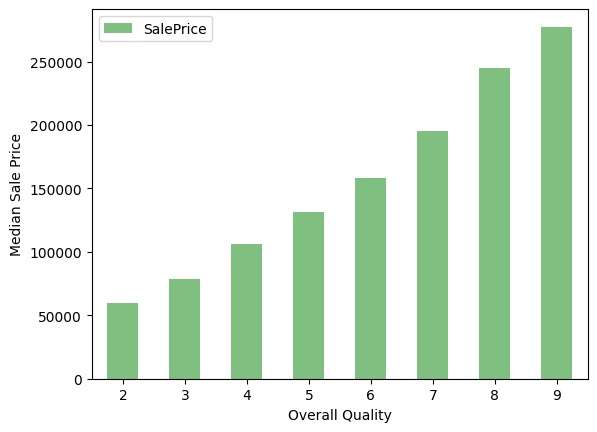

In [18]:
# Create a pivot table to analyze the relationship between 'OverallQual' and 'SalePrice'
# Calculate the median 'SalePrice' for each 'OverallQual' category
quality_pivot = house_price.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

# Create a bar plot to visualize the relationship
# Set the plot type to 'bar' and color to green with specified transparency
quality_pivot.plot(kind='bar', color='green', alpha=0.5)

# Customize the plot labels and appearance
plt.xlabel('Overall Quality')  # X-axis label
plt.ylabel('Median Sale Price')  # Y-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

5. Let's further analyze the relationship between 'SalePrice' and 'Overall Quality' using box plots.

    <span style="color: blue;">Question:</span> Create box plots to visually compare the distribution of 'SalePrice' across different levels of 'Overall Quality' in the cleaned <code>house_price</code> dataset.
   

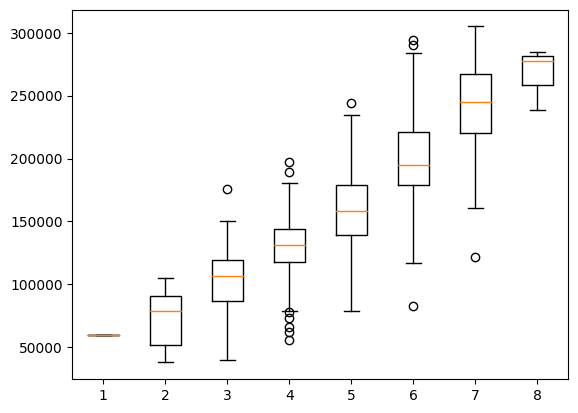

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique values from the 'OverallQual' column and sort them
vls = np.sort(house_price['OverallQual'].unique())

# Initialize a dictionary to store data for each 'OverallQual' category
boxplot_dict = {}
data = []

# Iterate through each 'OverallQual' category
for i in vls:
    # Select 'SalePrice' values where 'OverallQual' matches the current category
    boxplot_dict[i] = house_price['SalePrice'].values[house_price['OverallQual'] == i]
    data.append(house_price['SalePrice'].values[house_price['OverallQual'] == i])

# Create a new figure
fig = plt.figure()

# Create a boxplot using the collected data
plt.boxplot(data)

# Display the boxplot
plt.show()


💡 Box plots provide a visual summary of data distribution, showing the median, quartiles, and potential outliers. Unlike bar graphs, they offer insights into data spread and skewness, enhancing the understanding of variability within each category.


## 4. Preprocessing features

1. Let's move on to preprocessing the categorical features in the dataset.

    <span style="color: blue;">Question:</span> Display the unique values of each categorical feature in the cleaned <code>house_price</code> dataset?


In [20]:
# Select categorical features from the 'house_price' dataset
categoricals = house_price.select_dtypes(exclude=[np.number])

# Display unique identifiers for each categorical feature
for c in categoricals.columns:
    # Print the column name aligned to the left with a width of 14 characters
    # along with the unique values in that column
    print('{:<14}'.format(c), house_price[c].unique())


MSZoning       ['RL' 'RM' 'C (all)' 'FV' 'RH']
ExterQual      ['Gd' 'TA' 'Ex' 'Fa']
ExterCond      ['TA' 'Fa' 'Gd']
BsmtQual       ['Gd' 'TA' 'Ex' 'Fa']
BsmtExposure   ['No' 'Mn' 'Av' 'Gd']
HeatingQC      ['Ex' 'Gd' 'TA' 'Fa' 'Po']
CentralAir     ['Y' 'N']
KitchenQual    ['Gd' 'TA' 'Fa' 'Ex']
GarageQual     ['TA' 'Fa' 'Gd' 'Ex' 'Po']


2. We will now convert categorical features to real numbers for better compatibility with machine learning algorithms.

    <span style="color: blue;">Question:</span> Convert specific categorical features in the cleaned <code>house_price</code> dataset to real numbers based on predefined mappings


In [21]:
# Map categorical values to numeric values for specific columns
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

3. To handle categorical features without inherent order, we'll create dummy columns.

    <span style="color: blue;">Question:</span>Generate dummy columns for specific categorical features in the cleaned <code>house_price</code> dataset and join them with the original dataset
   


In [22]:
# Create dummy variables for specific columns and drop the first column to prevent multicollinearity
dummy_col = pd.get_dummies(house_price[['MSZoning', 'CentralAir']], drop_first=True)

# Extract the list of column names for the new categorical columns
categorical_col = list(dummy_col.columns)
categorical_col

['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'CentralAir_Y']

In [23]:
# Concatenate the dummy variables DataFrame with the original 'house_price' DataFrame
house_price = pd.concat([house_price, dummy_col], axis='columns')

# Drop the original categorical columns 'MSZoning' and 'CentralAir'
house_price = house_price.drop(['MSZoning', 'CentralAir'], axis='columns')


In [24]:
# Select specific converted and dummy columns to inspect
selected_columns = ['ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'GarageQual', 'ExterCond',
                    'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'CentralAir_Y']

# Display the selected columns' data for the first few rows
house_price[selected_columns].head()


,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageQual,ExterCond,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,CentralAir_Y
0,3,4,1,4,3,3,2,False,False,True,False,True
2,3,4,2,4,3,3,2,False,False,True,False,True
3,2,3,1,3,3,3,2,False,False,True,False,True
4,3,4,3,4,3,3,2,False,False,True,False,True
5,2,4,1,4,2,3,2,False,False,True,False,True


## 5. Modelling Linear Regression
1. Moving on to the modeling phase. We need to first standardize the features and the target variable as they can be of different scales.

    <span style="color: blue;">Question:</span> Perform standardization on the non-categorical features and the target variable in the <code>house_price</code> dataset using the <code>StandardScaler</code> from <code>sklearn.preprocessing</code>


In [25]:
from sklearn.preprocessing import StandardScaler

# Identify the numeric columns by finding the set difference between all columns and categorical columns
num_col = list(set(house_price.columns) ^ set(categorical_col))

# Initialize a StandardScaler object
scaler = StandardScaler()

# Apply the standardization to the numeric columns
house_price[num_col] = scaler.fit_transform(house_price[num_col])


2. Next, we'll split the dataset into feature and target variables.

    <span style="color: blue;">Question:</span> Separate the target variable ('SalePrice') from the <code>house_price</code> dataset and assign it to <code>y</code>. Assign the rest to <code>X</code>

In [26]:
# Extract the 'SalePrice' column as the target variable and remove it from the 'house_price' DataFrame
y = house_price.pop('SalePrice')

# The 'y' variable now contains the target variable (SalePrice)
# The 'house_price' DataFrame now only contains the remaining features

# 'X' now contains the remaining features from the 'house_price' DataFrame
X = house_price


3. Let's proceed by building a Linear Regression model to predict house prices.

    <span style="color: blue;">Question:</span> Construct a linear regression model to predict house prices. Print p values.
   



In [27]:
import statsmodels.api as sm

# Add constant to X for the intercept
X_with_intercept = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_intercept.astype(float)).fit()

# Get the predicted values
y_pred = model.predict(X_with_intercept)

# Calculate the R-squared score
r2 = model.rsquared
print("R-squared score on training set:", r2)

R-squared score on training set: 0.8890139768758225


4. Let's visualize the learned parameters from the model.

    <span style="color: blue;">Question:</span> Create a bar plot to visualize the learned parameters from the regression model? Examine what does this plot reveal about the impact of different features on the predicted house prices?


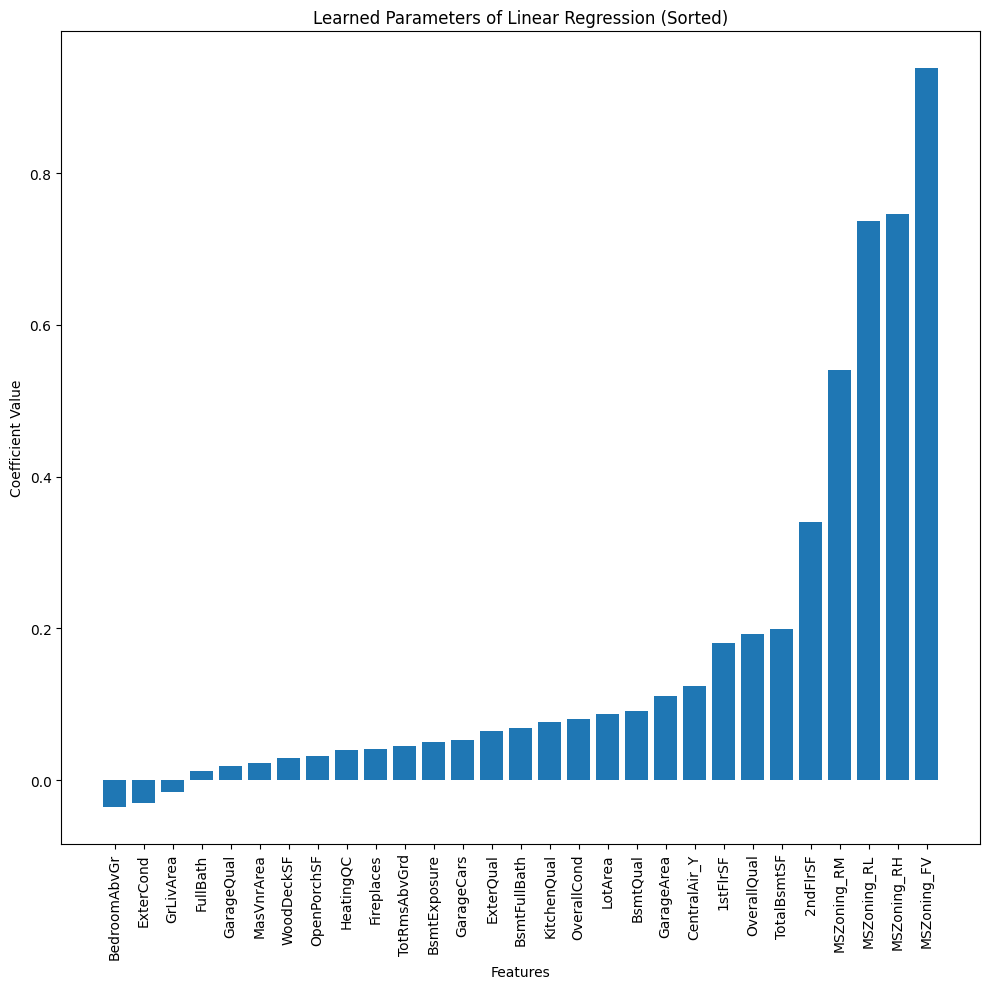

In [28]:
import matplotlib.pyplot as plt

# Get the coefficients from the fitted model
coefficients = model.params[1:]  # Exclude the intercept

# Get the feature names
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients in descending order
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=True)

# Create a vertical bar plot of sorted coefficients
plt.figure(figsize=(10, 10))
plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.title("Learned Parameters of Linear Regression (Sorted)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensures all labels are visible
plt.show()

💡 More importantly, the p-values of regression coefficients are used to determine whether there is a statistically significant relationship between each predictor variable and the response variable 

💡 A low p-value (less than some significance level, such as 0.1 or 0.05) indicates that we can reject the null hypothesis and conclude that there is a statistically significant relationship between the predictor variable and the response variable.

4. Let's display the p-values associated with the coefficients of the variables used in the linear regression.

    <span style="color: blue;">Question:</span> Print the p-values associated with the co-efficient estimates of the linear regression model


In [29]:
print("P-values for coefficients:")
print(model.pvalues)

P-values for coefficients:
const           3.254892e-07
LotArea         2.372576e-09
OverallQual     4.492364e-20
OverallCond     1.452249e-09
MasVnrArea      6.567705e-02
ExterQual       8.490941e-04
ExterCond       1.160834e-02
BsmtQual        1.427275e-07
BsmtExposure    9.924201e-05
TotalBsmtSF     9.788451e-13
HeatingQC       6.870516e-03
1stFlrSF        4.940309e-02
2ndFlrSF        3.692848e-03
GrLivArea       8.890006e-01
BsmtFullBath    2.892916e-08
FullBath        4.917429e-01
BedroomAbvGr    4.167611e-02
KitchenQual     7.237619e-06
TotRmsAbvGrd    4.145039e-02
Fireplaces      1.763316e-03
GarageCars      4.545593e-02
GarageArea      1.590641e-05
GarageQual      1.298906e-01
WoodDeckSF      1.713143e-02
OpenPorchSF     1.514840e-02
MSZoning_FV     4.492247e-08
MSZoning_RH     1.646222e-04
MSZoning_RL     3.151416e-06
MSZoning_RM     6.535737e-04
CentralAir_Y    4.848893e-02
dtype: float64


💡 It can be seen seen that majority of these variables have significant (i.e., with p-value less than 0.1) impact on the sales. Hence, linear regression is not that useful in this  <span style="color: red;">context</span>.


1. In the next step, we will build a Lasso regression model that predict house prices, while performing feature selection.

    <span style="color: blue;">Question:</span> Create and train this Lasso regression mode.


In [30]:
from sklearn.linear_model import Lasso

lm = Lasso(alpha=0.01)
lm.fit(X,y)

Lasso(alpha=0.01)

2. With the trained Lasso regression model, let's obtain the fitted values for the training data.

    <span style="color: blue;">Question:</span> Use the <code>predict()</code> function to generate the fitted values for the training data


In [31]:
y_pred = lm.predict(X)

3. Let's evaluate the performance of the Lasso regression model using the R-squared metric.

    <span style="color: blue;">Question:</span> Use the <code>rsquared</code> function.


In [32]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y,y_pred=y_pred))

0.8813211385181264


4. Let's inspect the learned coefficients (weights) and the intercept (bias) of the Lasso regression model.

    <span style="color: blue;">Question:</span> Retrieve the coefficients of the features along with the intercept for the Lasso regression model.

In [33]:
# Get the coefficients and intercept from the linear regression model
model_parameter = list(lm.coef_)  # Coefficients of features
model_parameter.insert(0, lm.intercept_)  # Intercept

# Round the coefficients and intercept to three decimal places
model_parameter = [round(x, 3) for x in model_parameter]

# Get the list of column names from the feature matrix
col = list(X.columns)

# Insert 'Constant' as the first element in the list of column names
col.insert(0, 'Constant')

# Combine the column names and corresponding model parameters using zip
parameter_summary = list(zip(col, model_parameter))
parameter_summary

[('Constant', 0.02),
 ('LotArea', 0.08),
 ('OverallQual', 0.216),
 ('OverallCond', 0.064),
 ('MasVnrArea', 0.016),
 ('ExterQual', 0.069),
 ('ExterCond', -0.013),
 ('BsmtQual', 0.101),
 ('BsmtExposure', 0.034),
 ('TotalBsmtSF', 0.161),
 ('HeatingQC', 0.049),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.042),
 ('GrLivArea', 0.249),
 ('BsmtFullBath', 0.068),
 ('FullBath', 0.016),
 ('BedroomAbvGr', -0.0),
 ('KitchenQual', 0.081),
 ('TotRmsAbvGrd', 0.015),
 ('Fireplaces', 0.041),
 ('GarageCars', 0.046),
 ('GarageArea', 0.121),
 ('GarageQual', 0.012),
 ('WoodDeckSF', 0.027),
 ('OpenPorchSF', 0.031),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.131),
 ('CentralAir_Y', 0.0)]

5. Let's visualize the learned parameters from the Lasso regression model.

    <span style="color: blue;">Question:</span> Create a bar plot to visually represent the learned parameters from the Lasso regression model. What insights can you gather from this visualization regarding the impact of different features on the predicted house prices?
   
    


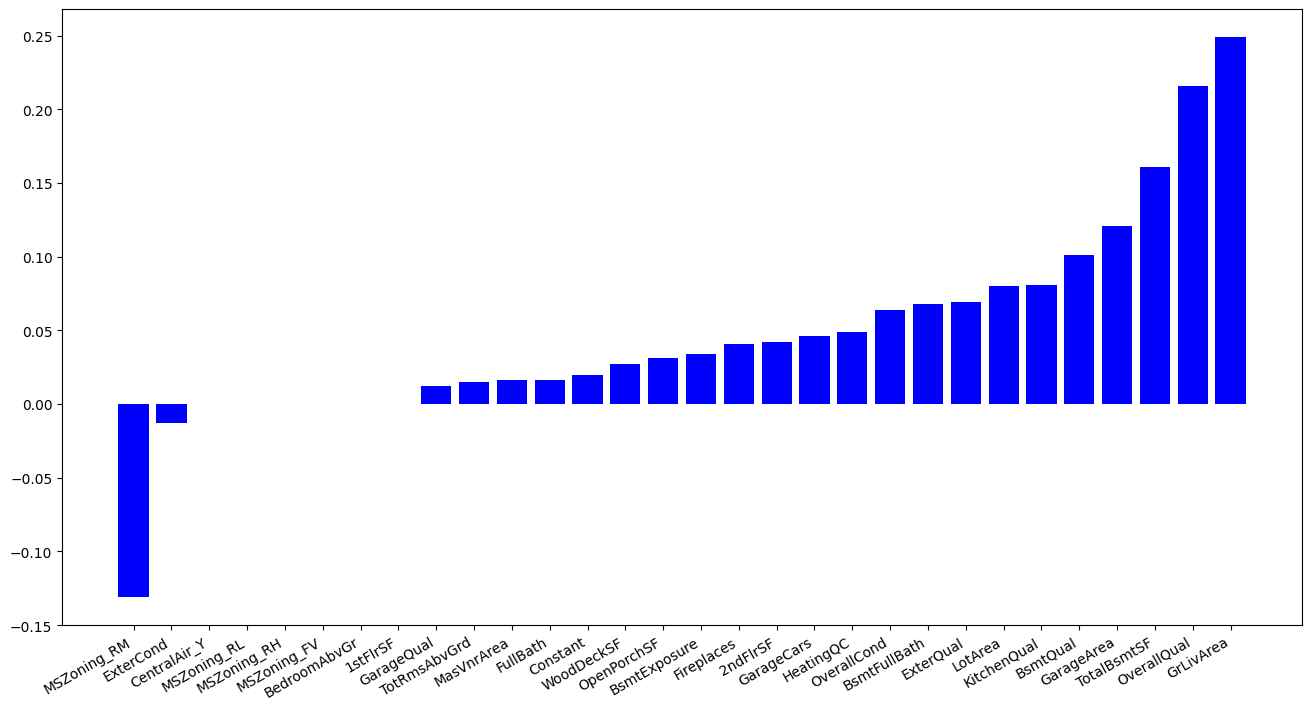

In [34]:
# Get the indices that would sort the model_parameter array
index = np.argsort(model_parameter)

# Sort the column names and model parameters based on the sorted indices
col, model_parameter = np.array(col)[index], np.array(model_parameter)[index]

# Create a figure for the bar plot
plt.figure(figsize=(16, 8))

# Create a bar plot to visualize the learned parameters
plt.bar(np.arange(len(col)), model_parameter, color='blue')

# Set x-axis ticks and labels
plt.xticks(np.arange(len(col)), col, rotation=30, ha='right')

# Display the plot
plt.show()


💡 Lasso regression is known for its feature selection capability, where it can drive certain feature coefficients to exactly zero. This is particularly useful when dealing with datasets with many features, as irrelevant features can be effectively eliminated from the model. The coefficients provide insights into how much each feature contributes to the prediction, and the ability to make some coefficients zero helps in simplifying the model and avoiding overfitting.


💡 Some variables such as 'MSZoning RH', 'MSZoning RL', and 'MSZoning FV' have zero parameter values. 

6. Let's create a histogram to compare the true and predicted values of the target variable from the Lasso regression model.

    <span style="color: blue;">Question:</span> Use the <code>plt.hist()</code> function to create a histogram that visually compares the distribution of true and predicted values of the target variable (<code>y</code>) from the Lasso regression model.


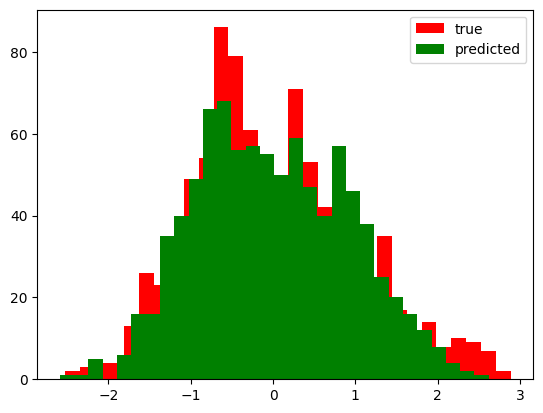

In [35]:
# Create a new figure for the histograms
plt.figure()

# Create histograms for true and predicted values
# Use red color for true values and green color for predicted values
# Set the number of bins to 30 for each histogram
plt.hist(y, label='true', color='red', bins=30)
plt.hist(y_pred, label='predicted', color='green', bins=30)

# Add a legend to distinguish between true and predicted histograms
plt.legend()


7. To better understand the benefits of Lasso regression over linear regression, consider an iterative process of adding features.

    <span style="color: blue;">Question:</span> Iteratively add features to observe the impact of Lasso regression compared to linear regression


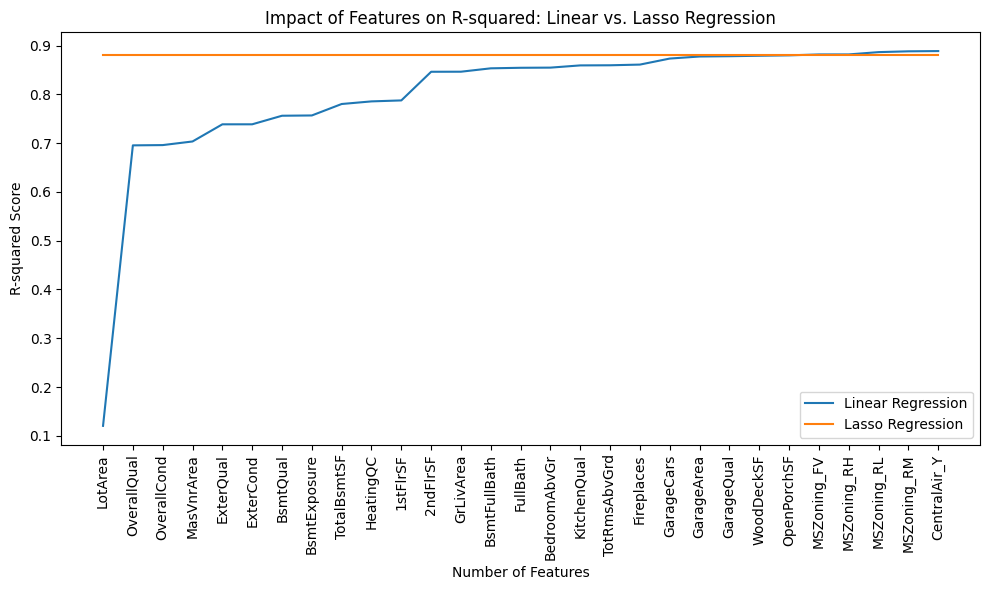

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

# Initialize lists to store R-squared scores for Linear and Lasso regression
linear_r2_scores = []
lasso_r2_scores = []

# Iterate through each feature and add it iteratively to Linear regression
for i in range(1, len(X.columns) + 1):
    # Select the current subset of features for Linear regression
    X_subset = X.iloc[:, :i]
    
    # Fit Linear regression
    linear_model = LinearRegression()
    linear_model.fit(X_subset, y)
    y_pred_linear = linear_model.predict(X_subset)
    
    # Calculate and store R-squared score for Linear regression
    linear_r2_scores.append(r2_score(y, y_pred_linear))
    
# Fit Lasso regression with all features
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso_model.fit(X, y)
y_pred_lasso = lasso_model.predict(X)

# Calculate the R-squared score for Lasso regression
lasso_r2 = r2_score(y, y_pred_lasso)
lasso_r2_scores = [lasso_r2] * len(X.columns)

# Plot the R-squared scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns) + 1), linear_r2_scores, label='Linear Regression')
plt.plot(range(1, len(X.columns) + 1), lasso_r2_scores, label='Lasso Regression')
plt.xlabel("Number of Features")
plt.ylabel("R-squared Score")
plt.title("Impact of Features on R-squared: Linear vs. Lasso Regression")
plt.legend()
plt.xticks(range(1, len(X.columns) + 1), X.columns, rotation=90)
plt.tight_layout()
plt.show()


💡 <span style="color: purple;">At the end of this iterative process,</span> we observe that after a certain point, addition of more variables does not improve the R-squared value of the linear regression model. 

💡 In fact, some variables such as 'MSZoning RH', 'MSZoning RL', and 'MSZoning FV' which donot improve R-square for the linear regression model, have zero coefficient estimates in the case of LASSO. 
This result showcases the benefit of Lasso regression in feature selection, where it effectively removes certain features from the model by shrinking their coefficients to zero. As a result, Lasso helps in reducing the model complexity and enhancing its interpretability while maintaining competitive predictive performance (R-square value).
